<center>
<span style="line-height:32px;display:block;font-size:32px;font-weight:bolder;">Cardiovascular Study Dataset</span>
<span style="line-height:32px;display:block;font-size:14px;font-weight:bold;color:gray;">Predicting Heart Disease of Patients</span>
<br>
<br>    
<img src="./images/image-01.jpg?1" />
<br>
<br>
<span style="line-height:32px;display:block;font-size:16px;font-weight:bold;">University of Catania - Master Degree in Data Science</span>
<span style="line-height:32px;display:block;font-size:16px;font-weight:bold;">Academic year 2020/2021</h3>
<span style="line-height:32px;display:block;font-size:16px;font-weight:bold;">Project notebook or Fondamenti di Analisi Data</span>
<br>
<br>
<br>
<span style="line-height:32px;display:block;font-size:16px;font-weight:bold;">Marco Cavalli - 1000024189</span>
<span style="line-height:32px;display:block;font-size:16px;font-weight:bold;">Teachers: G. Gallo - P. Riela</span>
</center>

In [176]:
%%javascript
$.getScript('scripts/table_of_contents.js')
//This cell is needed only to creat§ the table of contents

<IPython.core.display.Javascript object>

<p style="line-height:32px;display:block;font-size:32px;font-weight:bolder;" id="toctitle">Table of Contents</p>
<div id="toc"></div>

<h1>1 Introduction</h1>

<h2>1.1 Purposes</h2>

<p>World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications.</p>

<p>This notebook main purpose was to study the Framingham Heart dataset. The research on this dataset was organized in these three main sections:</p>

<ol>
    <li>Section one: Data Analysis and Data Refactor</li>
    <li>Section two: Descriptive statistics on the data</li>
    <li>Section three: Classification</li>
</ol>

<h2>1.2 About the dataset</h2>

<p>The dataset is publically available on the Kaggle <a href="https://www.kaggle.com/amanajmera1/framingham-heart-study-dataset">website</a>. It contains the data of over 4000 residents of the town of Framingham, Massachusetts. The meaning of this dataset is to determine if the patients will suffer at least a CHD (coronary heart disease) or not in ten years.</p>

<p>To able to reach this goal, for each person they gave fifteen attributes divided in three groups: demographic, medical history of the patient and his or her current medical status (such as BMI, heart rate etc). Each attribute is a potential risk factor to determine if the patient will suffer a CHD in ten years.</p>

<p>It follows now the list of the attributes:</p>

<ol>
    <li>Demographic
        <ul>
            <li>sex: male (value 1) or female (value 0)</li>
            <li>age: Number of years as an integer number</li>
            <li>education: Some High School (value 1); High School Degree or GED (value 2); Some College or Vocational School (value 3); College Degree or Vocational School Degree (value4)</li>
            <li>currentSmoker: Smoker (1) or Nonsmoker (0)</li>
            <li>cigsPerDay: Average number of cigarettes smoked per day as an integer (0 for nonsmokers)</li>
        </ul>
    </li>
    <li>Medical History of the patient
        <ul>
            <li>BPMeds: Whether the patient is on Blood Pressure medications (value 1) or not (value 0)</li>
            <li>prevalentStroke: Whether the patient already had at least a stroke (value 1) or not (value 0)</li>
            <li>prevalentHyp: Whether the patient is hypertensive (value 1) or not (value 0)</li>
            <li>diabetes: Whether the patient has diabetes (value 1) or not (value 0)</li>
        </ul>
    </li>
    <li>Current Medical Status of the patient
        <ul>
            <li>totChol: Float number of the cholesterol measured as mg/dL</li>
            <li>sysBP: Float number of the systolic blood pressure measured as mmHg</li>
            <li>diaBP: Float number of the diastolic blood pressure measured as mmHg</li>
            <li>BMI: Body Mass Index (weight/height$^{2}$) of the patient measured as kg/mt$^{2}$. It is a float number</li>
            <li>heartRate: Beats/Minute. It is an integer number</li>
            <li>glucose: Float number of the quantity of glucose in the patient's blood. Measured as mg/dL</li>
        </ul>
    </li>
</ol>


<p>As we said, this dataset is labeled. The column's name is TenYearCHD. There can be two possibilities:</p>

<ol>
    <li>Label 0: The patient won't have a CHD disease in 10 years.</li>
    <li>Label 1: The patient will have at laest one CHD disease in 10 years.</li>
</ol>

<h2>1.3 Descriptions of the job-phases</h2>

<h1>2 Requirements</h1>

<h2>2.1 Python modules</h2>

<p>To be able to run this code you will need to have the following modules:</p>

<ol>
    <li>numpy</li>
    <li>pandas</li>
    <li>matplotlib</li>
</ol>

<p>To install them you can either use the conda install command or pip.</p>

In [1]:
%%bash


conda install -c anaconda numpy pandas matplotlib scipy seaborn statsmodels
conda install -c conda-forge imbalanced-learn

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

## Package Plan ##

  environment location: /home/mc/anaconda3/envs/fad

  added / updated specs:
    - imbalanced-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2021.5.30  |       ha878542_0         136 KB  conda-forge
    certifi-2021.5.30          |   py38h578d9bd_0         141 KB  conda-forge
    imbalanced-learn-0.8.0     |     pyhd8ed1ab_0         109 KB  conda-forge
    joblib-1.0.1               |     pyhd8ed1ab_0         206 KB  conda-forge
    python_abi-3.8             |           2_cp38           4 KB  conda-forge
    scikit-learn-0.24.2        |   py38ha9443f7_0         5.4 MB
    threadpoolctl-2.1.0        |     pyh5ca1d4c_0          15 KB  conda-forge
    ------------------------------------------------------------
        

/home/mc/.local/lib/python3.7/site-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.6) or chardet (4.0.0) doesn't match a supported version!
  RequestsDependencyWarning)
/home/mc/.local/lib/python3.7/site-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.6) or chardet (4.0.0) doesn't match a supported version!
  RequestsDependencyWarning)


<p>This is the command to run if you want to use pip.</p>

In [8]:
%%bash

pip install numpy pandas matplotlib seaborn statsmodels imbalanced-learn

<h2>2.2 Download the dataset</h2>

<p>The dataset is inside the "./dataset" folder so it is not needed to download it. Anyway, if it would get any updates (it is unlikely since last update was 4 years ago) it is possible to retrieve it from this <a hred="https://www.kaggle.com/amanajmera1/framingham-heart-study-dataset/download">link</a>.</p>

<h2>2.3 Import all the libraries</h2>

<p>To avoid forgetting to import libraries, it is suggested to load all of them at once before going any further with the report.</p>

In [279]:
import math
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from operator import itemgetter
from statsmodels.formula.api import ols

#SCIPY
from scipy.stats import pearsonr
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import kendalltau

#SKLEARN
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, mean_squared_error, mean_absolute_error, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# DATASET BALANCING
from imblearn.over_sampling import SMOTE
from collections import Counter

# LOGISTIC REGRESSION
from statsmodels.formula.api import logit

seed = 123

<h1>3 Data Analysis and Data Refactor</h1>

<h2>3.1 Load the dataset</h2>

<p>As first thing it is needed to load the dataset. Using the "info" method it is possible to have a look at the big picture and to understand a little bit more the data in the dataset.</p>

In [280]:
framingham=pd.read_csv('dataset/framingham.csv')

<h2>3.2 Data quality assessment</h2>

In [281]:
framingham.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


<p>The first column is called "male". It would be less confusing to call it "sex". Since it is probably better to still using numbers instead of words as values for this column, it will keep the same logic as discussed in section 1.2 About the dataset: 0 for females and 1 for males.</p>

<p>It follows the operations block meant to change the name of the column "male" in "sex".</p>

In [282]:
framingham.columns = [col if col != 'male' else 'sex' for col in framingham]

<p><b>QUESTION: Are four classes for education really needed?</b></p>

<p>It it not needed to have four classes for education because three of them would be enough for this case. The reason about this conclusion is that class 2 and class 3 are redundant. For the records, class 2 means that the patient has an High School degree, meanwhile class 3 means that the patient tried to get a college degree, but he or she finally hasn't get it yet. So, class 2 and class 3 are grouped together in class 2 and class 4 (which is patients with a college degree) is relabeled as class 3.</p>

In [283]:
framingham['education'] = framingham['education'].fillna(1)
framingham['education'] = framingham['education'].replace({3:2})
framingham['education'] = framingham['education'].replace({4:3})
framingham['education'].describe()

count    4240.000000
mean        1.681132
std         0.663633
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: education, dtype: float64

<p><b>QUESTION: What to do with NaN values?</b></p>

<p>The biggest problem is related with the NaN values of the column "glucose" because it is an important value. The easiest thing to do would be to use the mean value, but it is possible to find a way to get these values with linear regretion. Given the fact that the "glucose" columns holds a very important data and that 400 records almost 8%/10% of the number of the records, it is probably a good idea to just drop the records with NaN values.</p>

<p>Lastly, six columns with NaN values remains, but the total number of records with NaN values are not so many. The strategy to adopt for these columns is the following:</p>

<ul>
    <li>For education, NaN values are replaced with "1" which is the lowest value/class</li>
    <li>For cigsPerDay, NaN values are replaced with "0" if the patient is not a smoker, or the mean value if he or she is a smoker</li>
    <li>For BPMeds/totChol/BMI/heartRate it will be the mean value</li>
</ul>

In [284]:
framingham['BPMeds'] = framingham['BPMeds'].fillna(-1)
framingham['totChol'] = framingham['totChol'].fillna(-1)
framingham['BMI'] = framingham['BMI'].fillna(-1)
framingham['heartRate'] = framingham['heartRate'].fillna(-1)
framingham['BPMeds'] = framingham['BPMeds'].replace({-1:2})
framingham['totChol'] = framingham['totChol'].replace({-1:2})
framingham['BMI'] = framingham['BMI'].replace({-1:2})
framingham['heartRate'] = framingham['heartRate'].replace({-1:2})

In [285]:
framingham = framingham.dropna()

<h1>4 Descriptive statistics on the data</h1>

<h2>4.1 Data distribution</h2>

In [286]:
framingham.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3827 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              3827 non-null   int64  
 1   age              3827 non-null   int64  
 2   education        3827 non-null   float64
 3   currentSmoker    3827 non-null   int64  
 4   cigsPerDay       3827 non-null   float64
 5   BPMeds           3827 non-null   float64
 6   prevalentStroke  3827 non-null   int64  
 7   prevalentHyp     3827 non-null   int64  
 8   diabetes         3827 non-null   int64  
 9   totChol          3827 non-null   float64
 10  sysBP            3827 non-null   float64
 11  diaBP            3827 non-null   float64
 12  BMI              3827 non-null   float64
 13  heartRate        3827 non-null   float64
 14  glucose          3827 non-null   float64
 15  TenYearCHD       3827 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 508.3 KB


<p>After filling/dropping NaN values, the dataset lost around 500 records. It is still acceptable, and it will be proved later on.</p>

<h3>4.1.1 CHD in 10 years</h3>

<p>This is a dataset created to perform classification tasks. The column which holds the labels is "TenYearCHD" which means if the patient will suffer a CHD in ten years.</p>

<p>In this section it will be given an answer to the following question:</p>

<ul>
    <li>Is the dataset balanced?</li>
</ul>

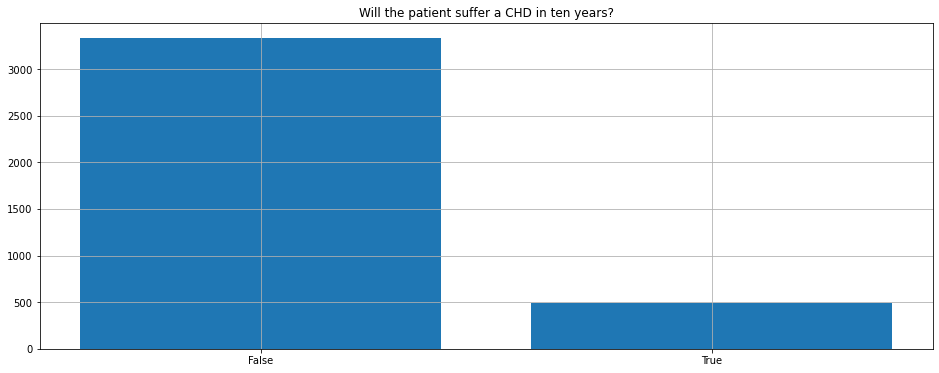

In [287]:
plt.figure(figsize=(16,6))
plt.title('Will the patient suffer a CHD in ten years?')
counts = framingham['TenYearCHD'].value_counts()
plt.bar(["False","True"],counts)
plt.grid()

<p>As the plot shows, this dataset is unbalanced. It is clearly shown that for each person that will have a CHD in ten years there are about 5 who won't. Obviously, this can be a problem, but it will be addressed in section 5, during the classification task.</p>

<h3>4.1.2 Sex and Age</h3>

<p>In this section, it will be put a focus on sex and age distributions.</p>

<p>Questions related to this section are:</p>

<ul>
    <li>Are there more female or male in the dataset?</li>
    <li>What is the distribution of ages of the dataset?</li>
    <li>And what about the distribution of ages of persons who will suffer a CHD?</li>
    <li>Are distribution of male and female alike?</li>
</ul>

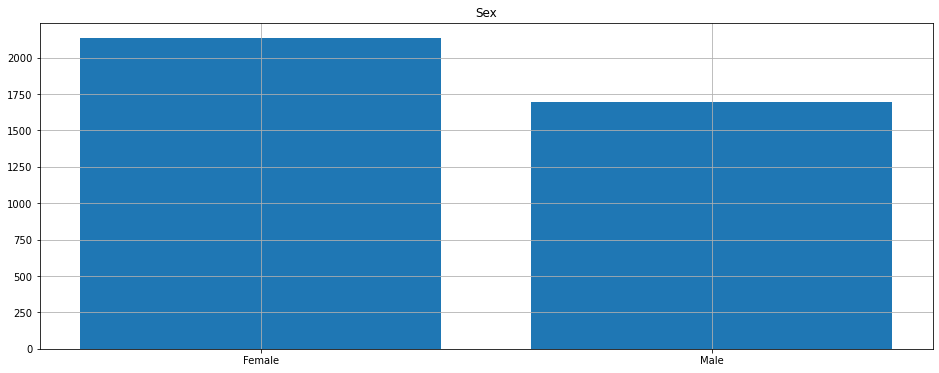

In [288]:
plt.figure(figsize=(16,6))
plt.title('Sex')
counts = framingham['sex'].value_counts()
plt.bar(["Female", "Male"],counts)
plt.grid()

<p>The female population of the dataset is higher slightly of the male population.</p>

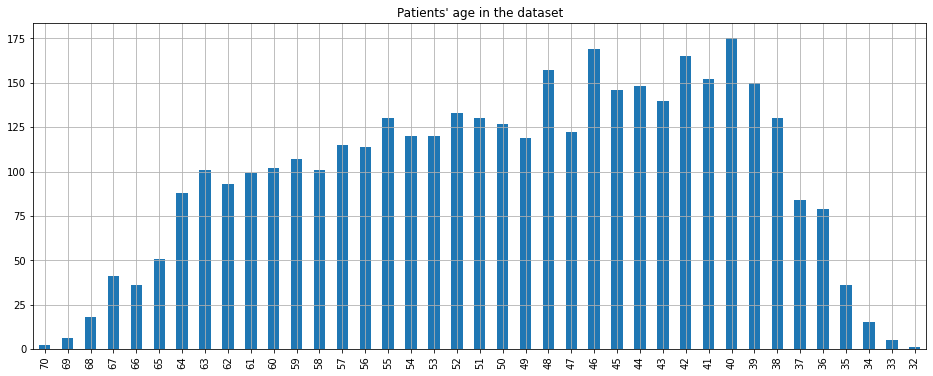

In [289]:
plt.figure(figsize=(16,6))
plt.title('Patients\' age in the dataset')
counts = framingham['age'].value_counts().sort_index(ascending=False).plot.bar()
plt.grid()

<p>The distribution of the patients' age is almost a gaussian: given a record from the dataset, the probability that it is of a very old person or a very young person is low.</p>

<p>Futhermore, this graphs tells another story: younger persons care of their health regarding CHDs. It is clear that CHDs are not only a problem concerning old persons, but it can depend from many different things and no one should underestimate this danger.</p>

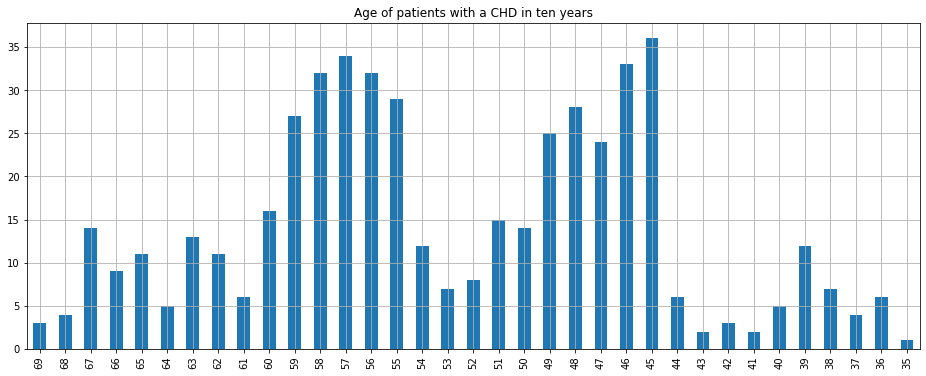

In [290]:
plt.figure(figsize=(16,6))
plt.title('Age of patients with a CHD in ten years')
counts = (framingham[framingham['TenYearCHD']==1])['age'].value_counts().sort_index(ascending=False).plot.bar()
plt.grid()

<p>This graph shows the age distribution of patients who will suffer of a CHD in 10 years (with no treatments).</p>

<p>As obvious as it is, older persons are more in danger and they will suffer of a CHD more likely than younger persons. But this graphs shows that younger people must not underestimate their health care.</p>

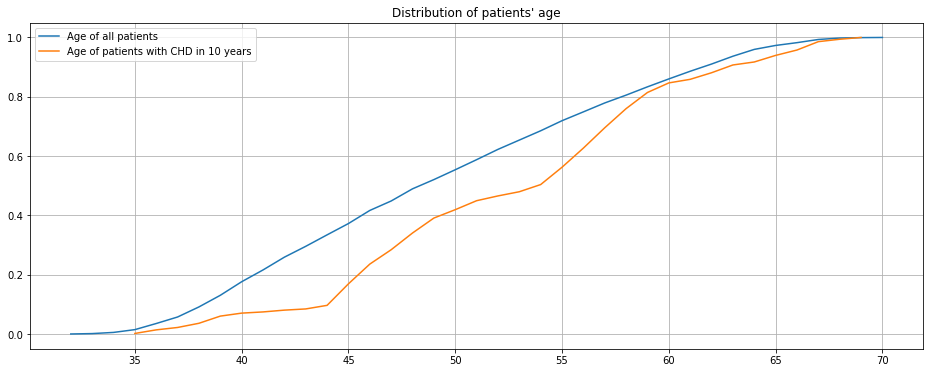

In [291]:
plt.figure(figsize=(16,6))
plt.title('Distribution of patients\' age')
cdf_all = framingham['age'].value_counts(normalize=True).sort_index(ascending=True).cumsum()
cdf_chd = (framingham[framingham['TenYearCHD']==1])['age'].value_counts(normalize=True).sort_index(ascending=True).cumsum()
plt.plot(cdf_all.index, cdf_all.values)
plt.plot(cdf_chd.index, cdf_chd.values)
plt.legend(["Age of all patients", "Age of patients with CHD in 10 years"])
plt.grid()

<p>The reason behind this graph was to show if the distribution of age of the dataset was similar to the distribution of the age of persons who will suffer a CHD in 10 year. It is clear that it is not the case: among persons who will have a CHD in 10 years, the majority is older than 50/55 years old. This won't surely surprise the reader, but it was still worth pointing out.</p>

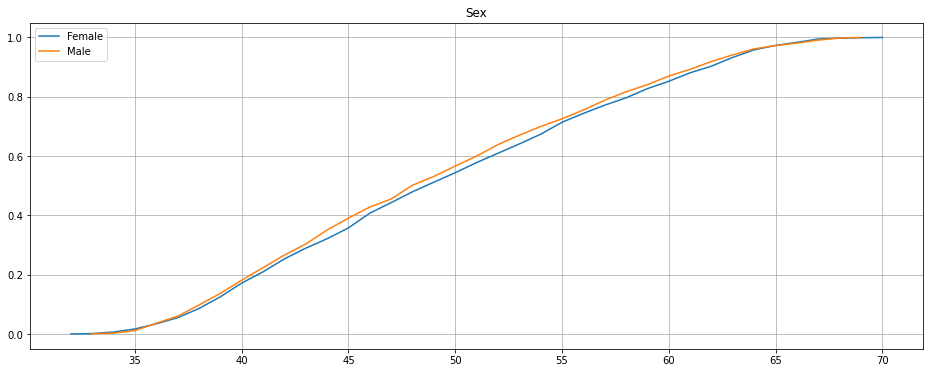

In [292]:
plt.figure(figsize=(16,6))
plt.title('Sex')
cdf_male = (framingham[framingham['sex']==1])['age'].value_counts(normalize=True).sort_index().cumsum()
cdf_female = (framingham[framingham['sex']==0])['age'].value_counts(normalize=True).sort_index().cumsum()
plt.plot(cdf_female.index, cdf_female.values)
plt.plot(cdf_male.index, cdf_male.values)
plt.legend(["Female", "Male"])
plt.grid()

<p>Distribution of age of persons in the dataset grouped by sex are similar. This is important, because it won't happen that a bias related to the sex of the patient can be introduced when proceding with classification tasks (or at least it will be less likely).</p>

<h3>4.1.3 Smokers</h3>

<p>Smokers are clearly more likely to suffer a CHD in their future, so it could be worth to study the data distribution of smokers (number of cigarettes, sex...). However, it is a lot interesting and fascinating the possibility to check if there exists any relations with being a smoker with other features. For instance, it could be interesting to see if being a smoker is related to the level of education or to the age. To clearify, it is not a relationship meant as corelation, but just a comparation with graphs.</p>

<p>It could be worth to recall the education feature for the reader. Patients in the dataset may have three different education labels, depending on whether they have an high school degree or not, or if they have a college degree.</p>

<p>It will be given an answer to the following questions:</p>

<ul>
    <li>How many smokers are there in the dataset?</li>
    <li>Do men smoke more than women?</li>
    <li>Can the level of education give information about the smokers?</li>
</ul>

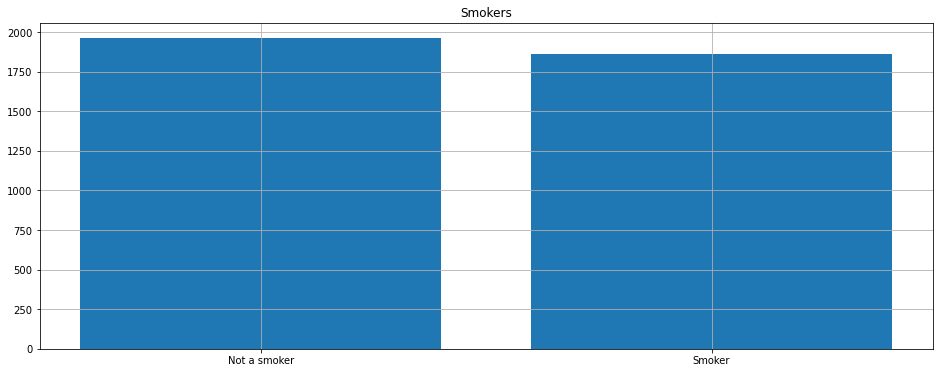

In [293]:
plt.figure(figsize=(16,6))
plt.title('Smokers')
counts = framingham['currentSmoker'].value_counts()
plt.bar(["Not a smoker", "Smoker"],counts)
plt.grid()

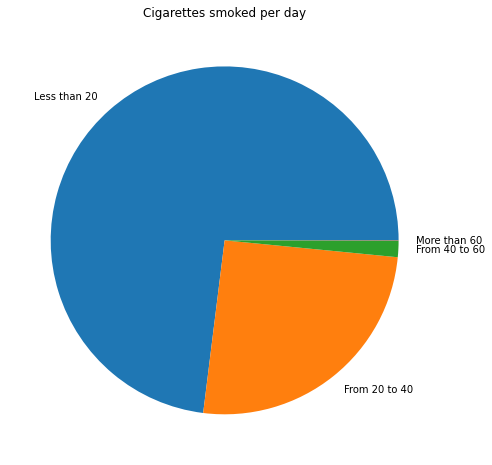

/home/mc/anaconda3/envs/fad/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


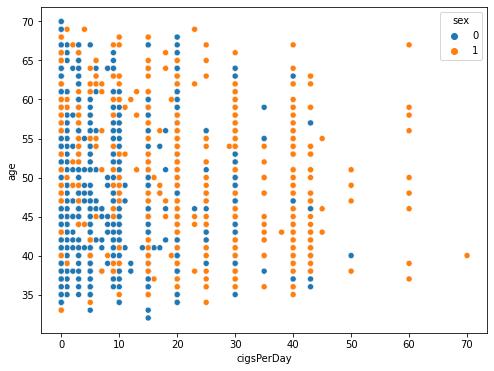

In [294]:
# Number of cigarettes smoked per day
counts = [0,0,0,0]

# Create 4 bins with width of 20
counts[0]=len((framingham[framingham['cigsPerDay']<20]))
counts[1]=len(framingham[(framingham['cigsPerDay']>=20)&(framingham['cigsPerDay']<40)])  
counts[2]=len(framingham[(framingham['cigsPerDay']>40)&(framingham['cigsPerDay']<60)])  
counts[3]=len(framingham[(framingham['cigsPerDay']>60)])


plt.figure(figsize=(16,8))
plt.title('Cigarettes smoked per day')
plt.pie(counts, labels=['Less than 20','From 20 to 40','From 40 to 60','More than 60'])
plt.show()


# Create scatterplot
plt.figure(figsize=(8,6))
sns.scatterplot(framingham['cigsPerDay'], framingham['age'], hue=framingham['sex'])
plt.show()

<p>Among the dataset smokers are the majority, but not by far. It is almost a 50%/50% scenario. In any case, the majority of the patients smoke less than 20 cigarettes. It could be possible to say that almost all the patients smoke less than 40 cigarettes a day. Only a couple of them smoke more than 40 ("luckily", someone would say).</p>

<p>The scatterplot shows the distribution of smokers filtered by sex (0 female, 1 male). It shows clearly that men tend to smoke more cigarettes per day than females.</p>

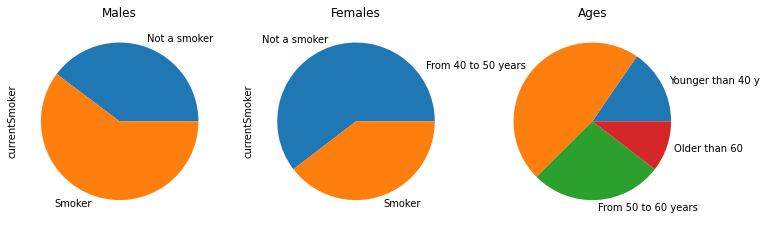

In [295]:
# Smokers/No-Smokers who are male
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.title('Males')
(framingham[framingham['sex']==1]).groupby('currentSmoker')['currentSmoker'].value_counts().plot.pie(labels=["Not a smoker","Smoker"])

# Smokers/No-Smokers who are female
plt.subplot(1,3,2)
plt.title('Females')
(framingham[framingham['sex']==0]).groupby('currentSmoker')['currentSmoker'].value_counts().plot.pie(labels=["Not a smoker","Smoker"])

# Smokers/No-Smokers by age

# Number of smokers grouped by age
counts = [0,0,0,0]

# Create 4 bins with width of 20
counts[0]=len(framingham[(framingham['currentSmoker']==1)&(framingham['age']<40)])
counts[1]=len(framingham[(framingham['currentSmoker']==1)&(framingham['age']>=40)&(framingham['age']<50)])  
counts[2]=len(framingham[(framingham['currentSmoker']==1)&(framingham['age']>=50)&(framingham['age']<60)])  
counts[3]=len(framingham[(framingham['currentSmoker']==1)&(framingham['age']>=60)])
                                                        
                                                        
plt.subplot(1,3,3)
plt.title('Ages')
plt.pie(counts, labels=['Younger than 40 y','From 40 to 50 years','From 50 to 60 years','Older than 60'])
plt.show()

<p>These graphs show an interesting fact: males smoke more than females. This could be due to cultural habits. For instance, in the past in many countries smoking was a sign to have become an adult man. In anycase, this report wants to be as much scientific as possible so the previous sentence must not be taken as the only reason for this difference, but it can be a clear example of why cultural habits can explain it.</p>

<p>Older people tend to smoke more than younger people. It is interesting to see that almost 50% of the smokers are 40/50 years old.</p>

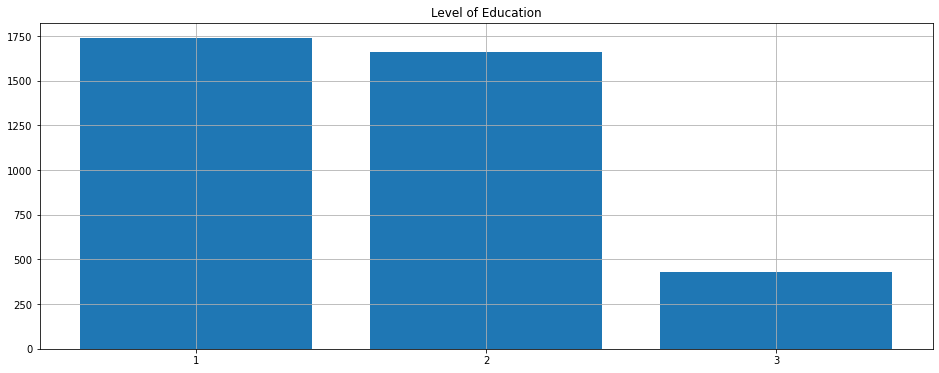

In [296]:
plt.figure(figsize=(16,6))
plt.title('Level of Education')
counts = framingham['education'].value_counts()
plt.bar(["1", "2", "3"],counts)
plt.grid()

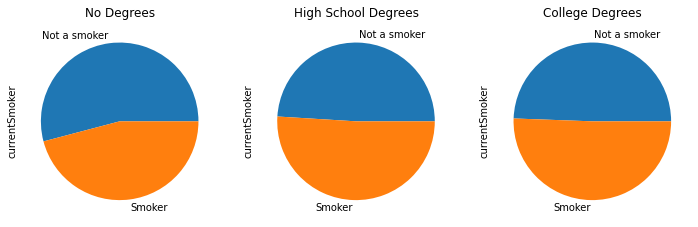

In [297]:
# Smokers/No-Smokers with no high school degress
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.title('No Degrees')
(framingham[framingham['education']==1]).groupby('currentSmoker')['currentSmoker'].value_counts().plot.pie(labels=["Not a smoker","Smoker"])

# Smokers/No-Smokers with an high school degress
plt.subplot(1,3,2)
plt.title('High School Degrees')
(framingham[framingham['education']==2]).groupby('currentSmoker')['currentSmoker'].value_counts().plot.pie(labels=["Not a smoker","Smoker"])

# Smokers/No-Smokers with a college degress
plt.subplot(1,3,3)
plt.title('College Degrees')
(framingham[framingham['education']==3]).groupby('currentSmoker')['currentSmoker'].value_counts().plot.pie(labels=["Not a smoker","Smoker"])
plt.show()

<p>Differently from the sex and the age, education doesn't seem so related with being a smoker.</p>

<h2>4.2 Boxplot</h2>

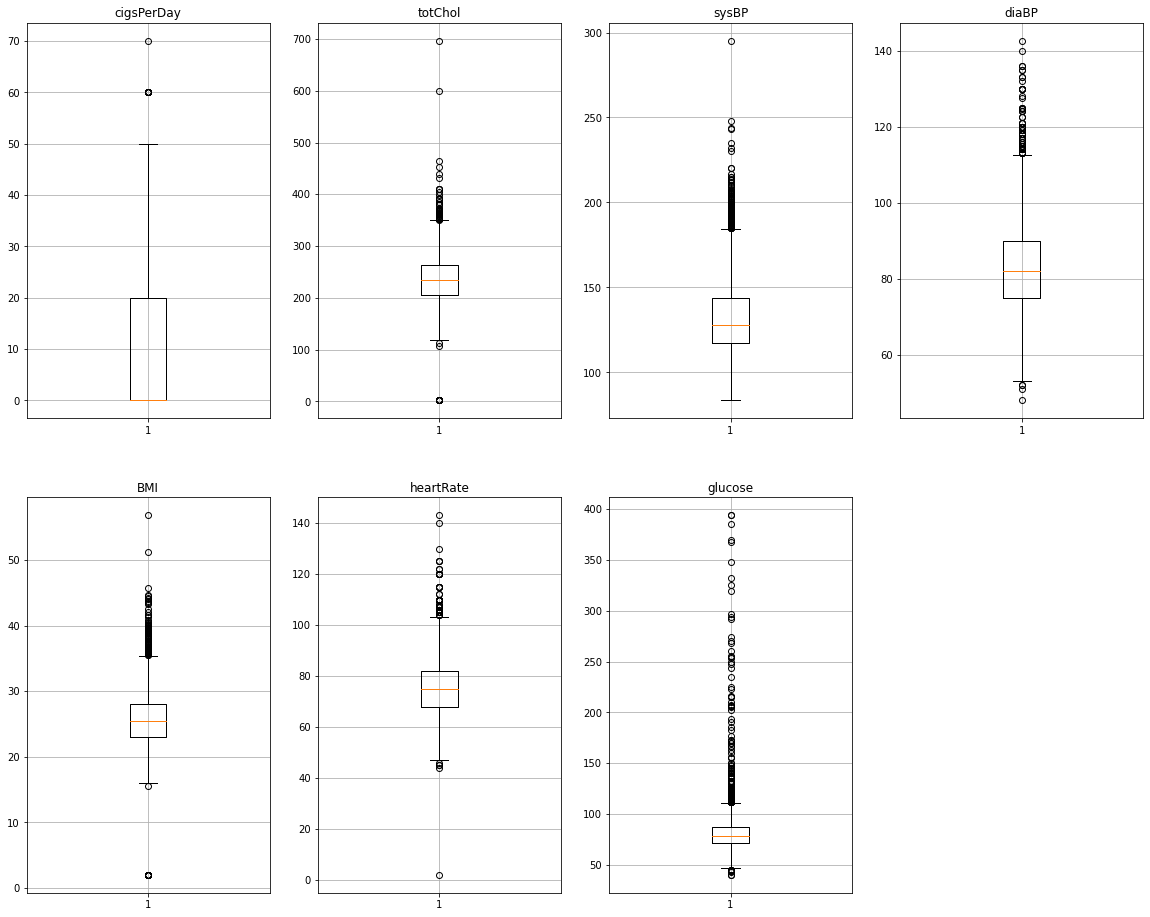

In [298]:
plt.figure(figsize=(20,16))

columns = ['cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
j=1
for i in columns:
    plt.subplot(2,4,j)
    j+=1
    plt.title(i)
    x=framingham[i]
    plt.boxplot(x)
    plt.grid()
plt.show()

<p>Used to study data distribution inside the dataset, boxplots are useful to get a lof of information of the data for specific columns of DataFrames. For instance it is easy to notice if there are outliers for a specific column.</p>

<p>Speaking of the Framingham dataset, most of the the columns are booleans so they don't carry a lot of interesting information. There is something worth to notice: the data of columns where the values are real numbers (totChol, sysBP, diaBP, BMI, heartRate, glucose) are consistent with what doctors say that "safe" values would be. Infact the "safe" values are something like:</p>

<ul>
    <li>Cholesterol: from 50 to 200</li>
    <li>Systolic BP: from 65 to 90</li>
    <li>Diastolic BP: from 70 to 130</li>
    <li>BMI: from 18 to 25</li>
    <li>Heart Rate: from 55 to 110</li>
    <li>Glucose: 60 to 110</li>
</ul>

<p>Most of the columns respect these values (or include them inside the first and the third quartile), except for the totChol that is very high: those values (200+) can be dangerous for the health of the patients.</p>

In [299]:
framingham.describe()

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3827.000000,3827.000000,3827.000000,3827.000000,3827.000000,3827.000000,3827.000000,3827.000000,3827.000000,3827.000000,3827.000000,3827.000000,3827.000000,3827.000000,3827.000000,3827.000000
mean,0.442383,49.642017,1.679383,0.487327,8.981448,0.056441,0.006271,0.313300,0.027437,236.302064,132.454142,82.927228,25.719647,75.692187,81.941207,0.129605
std,0.496734,8.608575,0.665717,0.499905,11.914705,0.282717,0.078953,0.463896,0.163373,46.256548,22.154501,11.969310,4.306019,11.973937,23.999215,0.335913
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,83.500000,48.000000,2.000000,2.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,205.500000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,1.000000,57.000000,2.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.500000,144.000000,90.000000,28.040000,82.000000,87.000000,0.000000
max,1.000000,70.000000,3.000000,1.000000,70.000000,2.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


<p>The description of the DataFrame confirm what it was said: there aren't a lot of outliers and mean values for some of these values (such as totChol) are higher than expected.</p>

<h2>4.3 Skewness and Kurtosis</h2>

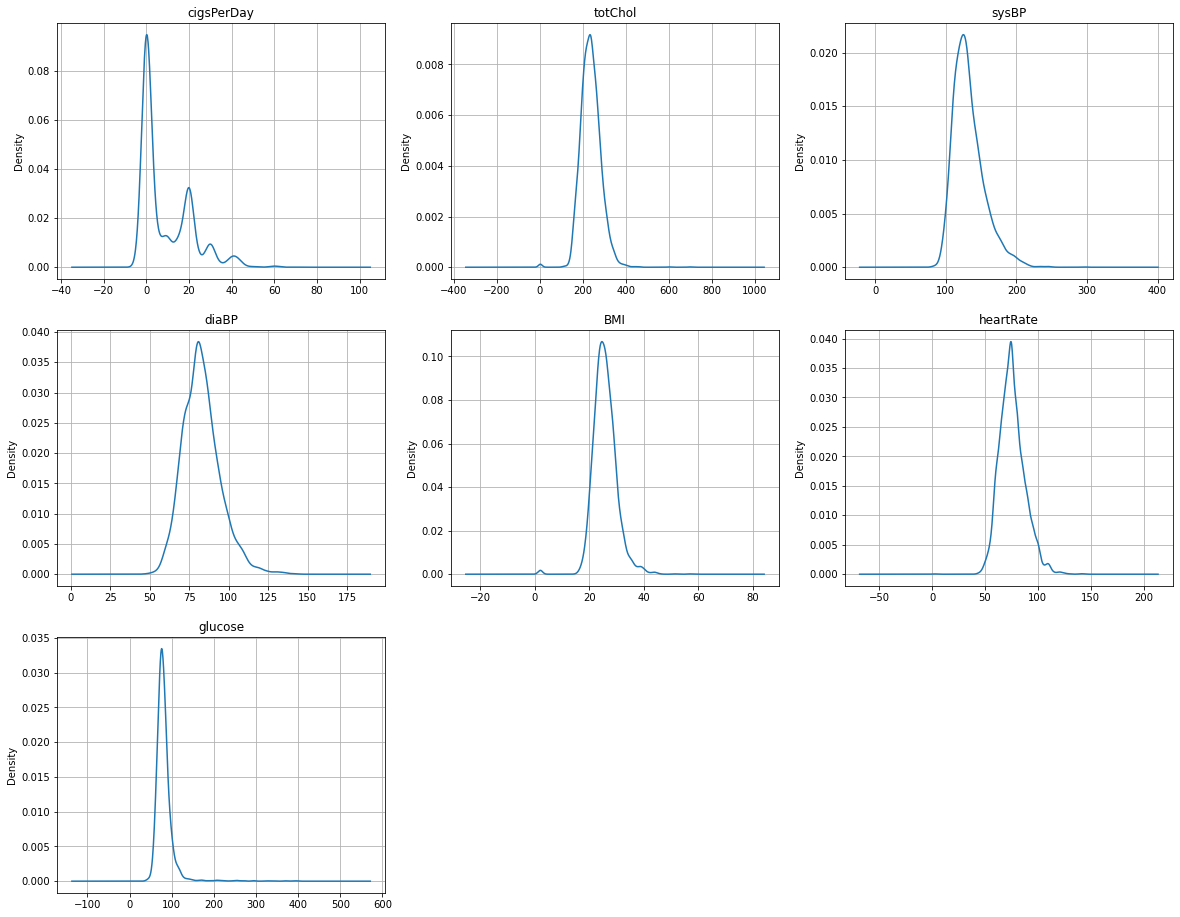

SKEWNESS
sex                 0.232104
age                 0.223339
education           0.469814
currentSmoker       0.050729
cigsPerDay          1.241410
BPMeds              5.433621
prevalentStroke    12.513488
prevalentHyp        0.805342
diabetes            5.788099
totChol             0.510808
sysBP               1.161437
diaBP               0.716014
BMI                 0.266243
heartRate           0.594958
glucose             6.220160
TenYearCHD          2.206456
dtype: float64 



KURTOSIS
sex                 -1.947145
age                 -1.000473
education           -0.759815
currentSmoker       -1.998471
cigsPerDay           1.006914
BPMeds              30.520377
prevalentStroke    154.668213
prevalentHyp        -1.352132
diabetes            31.518561
totChol              5.251010
sysBP                2.253075
diaBP                1.280760
BMI                  4.977567
heartRate            1.342147
glucose             58.660424
TenYearCHD           2.869946
dtype: float64


In [300]:
plt.figure(figsize=(20,16))

columns = ['cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
j=1
for i in columns:
    plt.subplot(3,3,j)
    j+=1
    plt.title(i)
    x=framingham[i]
    x.plot.density()
    plt.grid()
plt.show()
#indici di forma
print("SKEWNESS")
print(framingham.skew(),"\n\n\n")
print("KURTOSIS")
print(framingham.kurtosis())

<p>For all the columns where the values are real number (cigsPerDay, totChol, sysBP, diaBP, BMI, heartRate, glucose) it is possible to see that their estimated density graphs are all leptokurtic. Most of them have positive skew.</p>

<h2>4.4 Linear Regression</h2>

<p>In this section it will be used the linear regression to seek for columns that have high correlation: this will allow to forecast values of a specific column based on values of another columns.</p>

In [301]:
columns = framingham.columns
corr_arr= []

# PEARSON
for i in range(len(columns)):
    for j in range(i,len(columns)):
        if i!=j:
            corr_arr.append([columns[i], columns[j], \
                             pearsonr(framingham[columns[i]],framingham[columns[j]])[0], \
                             spearmanr(framingham[columns[i]],framingham[columns[j]])[0], \
                             kendalltau(framingham[columns[i]],framingham[columns[j]])[0]])

In [302]:
def print_correlations(data):
    for el in data:
        print("{} and {}: {:.2f}".format(el[0], el[1], el[2]))

corr_arr = sorted(corr_arr, key=itemgetter(2))
pearson_getter = itemgetter(0, 1, 2) 
pearsons = list(map(list, map(pearson_getter, corr_arr)))

print("PEARSON\n")

print("5 most inversely correlated")
print_correlations(pearsons[0:5])
print("\n\n")
print("5 most directly correlated")
pearsons.reverse()
print_correlations(pearsons[0:5])
print("\n\n")

corr_arr = sorted(corr_arr, key=itemgetter(3))
spearman_getter = itemgetter(0, 1, 3) 
spearmans = list(map(list, map(spearman_getter, corr_arr)))

print("SPEARMAN\n")

print("5 most inversely correlated")
print_correlations(spearmans[0:5])
print("\n\n")
print("5 most directly correlated")
spearmans.reverse()
print_correlations(spearmans[0:5])
print("\n\n")

corr_arr = sorted(corr_arr, key=itemgetter(4))
kendall_getter = itemgetter(0, 1, 4) 
kendall = list(map(list, map(kendall_getter, corr_arr)))

print("KENDALL\n")

print("5 most inversely correlated")
print_correlations(kendall[0:5])
print("\n\n")
print("5 most directly correlated")
kendall.reverse()
print_correlations(kendall[0:5])
print("\n\n")

PEARSON

5 most inversely correlated
age and currentSmoker: -0.21
age and education: -0.20
age and cigsPerDay: -0.19
currentSmoker and BMI: -0.15
education and BMI: -0.14



5 most directly correlated
sysBP and diaBP: 0.78
currentSmoker and cigsPerDay: 0.77
prevalentHyp and sysBP: 0.70
diabetes and glucose: 0.62
prevalentHyp and diaBP: 0.62



SPEARMAN

5 most inversely correlated
age and cigsPerDay: -0.21
age and education: -0.21
age and currentSmoker: -0.21
currentSmoker and BMI: -0.17
education and BMI: -0.15



5 most directly correlated
currentSmoker and cigsPerDay: 0.93
sysBP and diaBP: 0.78
prevalentHyp and sysBP: 0.70
prevalentHyp and diaBP: 0.62
age and sysBP: 0.39



KENDALL

5 most inversely correlated
age and currentSmoker: -0.17
age and education: -0.17
age and cigsPerDay: -0.16
currentSmoker and BMI: -0.14
education and BMI: -0.12



5 most directly correlated
currentSmoker and cigsPerDay: 0.85
sysBP and diaBP: 0.60
prevalentHyp and sysBP: 0.57
prevalentHyp and diaBP: 0.5

<p>It is clearly shown that there aren't so many columns correlated (either directly or inversely). Most of the correlated columns are "naive" ones: for instance, an high number of smoked cigarettes leads to the patient being a smoker, or an high quantity of systolic blood pressure leads to the patient being hypertensive.</p>

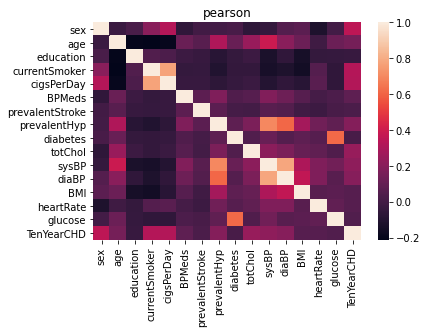

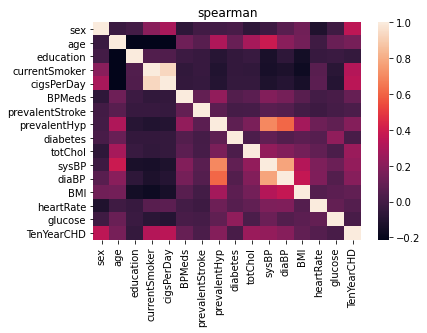

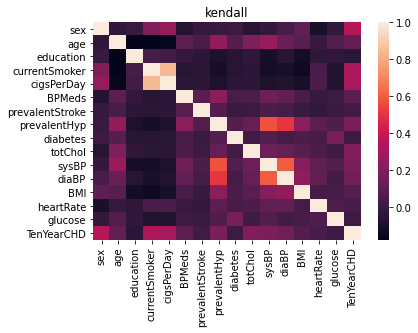

In [303]:
plt.title("pearson")
sns.heatmap(framingham.corr())
plt.show()

plt.title("spearman")
sns.heatmap(framingham.corr(method='spearman'))
plt.show()

plt.title("kendall")
sns.heatmap(framingham.corr(method='kendall'))
plt.show()

<p>The heatmaps what was said in the previous paragraph.</p>

<p>The only interesting thing to do is to try using linear regression on the columns 'sysBP' and 'diaBP'.</p>

sex ~ age: R^2 is too low.
sex ~ education: R^2 is too low.
sex ~ currentSmoker: R^2 is too low.
sex ~ cigsPerDay: R^2 is too low.
sex ~ BPMeds: R^2 is too low.
sex ~ prevalentStroke: R^2 is too low.
sex ~ prevalentHyp: R^2 is too low.
sex ~ diabetes: R^2 is too low.
sex ~ totChol: R^2 is too low.
sex ~ sysBP: R^2 is too low.
sex ~ diaBP: R^2 is too low.
sex ~ BMI: R^2 is too low.
sex ~ heartRate: R^2 is too low.
sex ~ glucose: R^2 is too low.
sex ~ TenYearCHD: R^2 is too low.
age ~ education: R^2 is too low.
age ~ currentSmoker: R^2 is too low.
age ~ cigsPerDay: R^2 is too low.
age ~ BPMeds: R^2 is too low.
age ~ prevalentStroke: R^2 is too low.
age ~ prevalentHyp: R^2 is too low.
age ~ diabetes: R^2 is too low.
age ~ totChol: R^2 is too low.
age ~ sysBP: R^2 is too low.
age ~ diaBP: R^2 is too low.
age ~ BMI: R^2 is too low.
age ~ heartRate: R^2 is too low.
age ~ glucose: R^2 is too low.
age ~ TenYearCHD: R^2 is too low.
education ~ currentSmoker: R^2 is too low.
education ~ cigsPerD

/home/mc/anaconda3/envs/fad/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


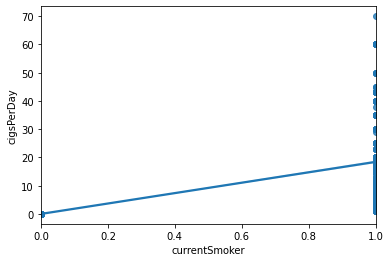

                            OLS Regression Results                            
Dep. Variable:          currentSmoker   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     5689.
Date:                Mon, 05 Jul 2021   Prob (F-statistic):               0.00
Time:                        11:48:31   Log-Likelihood:                -1032.9
No. Observations:                3827   AIC:                             2070.
Df Residuals:                    3825   BIC:                             2082.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1959      0.006     30.530      0.0

/home/mc/anaconda3/envs/fad/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


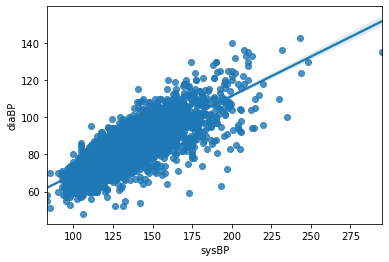

                            OLS Regression Results                            
Dep. Variable:                  sysBP   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     6102.
Date:                Mon, 05 Jul 2021   Prob (F-statistic):               0.00
Time:                        11:48:31   Log-Likelihood:                -15461.
No. Observations:                3827   AIC:                         3.093e+04
Df Residuals:                    3825   BIC:                         3.094e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.1129      1.557      7.782      0.0

In [304]:
columns = framingham.columns
for i in range(len(columns)):
    for j in range(i,len(columns)):
        if i!= j:
            t="{} ~ {} ".format(columns[i], columns[j])
            model = ols(t,framingham).fit()
            if model.rsquared>0.5:
                print("\n\n{} and {}:".format(columns[i], columns[j]))
                print(model.params)
                sns.regplot(columns[i], columns[j], framingham)
                plt.show()
                print(model.summary())
                print("\n\n")
            else:
                print('{} ~ {}: R^2 is too low.'.format(columns[i], columns[j]))

<p>Most of the columns are not strong enough to be used to forecast values for the other ones. Just two couple of columns have a value for the $R^2$ parameter higher than 0.5:</p>

<ul>
    <li>currentSmoker and cigsPerDay ($R^2$ of 0.598)</li>
    <li>diaBP and sysBP ($R^2$ of 0.615)</li>
</ul>

<p>It is possible that a multi-linear regression approach would give better results for other columns.</p>

In [305]:
columns = framingham.columns
r_squared = []
for i in range(len(columns)):
    for j in range(len(columns)):
        for z in range(len(columns)):
            if i!= j and j != z and i != z:
                t="{} ~ {}+{}".format(columns[i], columns[j], columns[z])
                model = ols(t,framingham).fit()
                if model.rsquared>0.6:
                    r_squared.append([columns[i], columns[j], columns[z], model.rsquared])

In [306]:
def print_r_squared(data):
    for el in data:
        print("{} from {} and {}:".format(el[0], el[1], el[2]), "R-squared: ", el[3])

In [307]:
r_squared_sorted = sorted(r_squared, key=itemgetter(3), reverse=True)
print_r_squared(r_squared_sorted[0:20:2]) #r-square values are duplicated

sysBP from prevalentHyp and diaBP: R-squared:  0.6901061151644203
sysBP from diaBP and age: R-squared:  0.6704093618687624
diaBP from sysBP and BMI: R-squared:  0.6312520222226206
cigsPerDay from sex and currentSmoker: R-squared:  0.6272558830076688
diaBP from age and sysBP: R-squared:  0.6269338631993555
diaBP from sysBP and prevalentHyp: R-squared:  0.6235427424829929
sysBP from glucose and diaBP: R-squared:  0.6233433855635441
diaBP from sex and sysBP: R-squared:  0.6226854191303708
sysBP from diaBP and sex: R-squared:  0.6222813200174839
sysBP from BPMeds and diaBP: R-squared:  0.622005098477723


<p>It seems that sysBP could be forecasted from a couple of different columns (and not just diaBP). It could be worth to check if the $R^2$ value would increase considering the following columns:</p>

<ul>
    <li>prevalentHyp</li>
    <li>age</li>
    <li>TenYearCHD</li>
    <li>glucose</li>
</ul>

In [308]:
print('\n\nCombination of two:')
columns = 'sysBP ~ prevalentHyp+diaBP+age'
print('{}. R-square: {}'.format(columns,ols(columns,framingham).fit().rsquared))
columns = 'sysBP ~ prevalentHyp+diaBP+TenYearCHD'
print('{}. R-square: {}'.format(columns,ols(columns,framingham).fit().rsquared))
columns = 'sysBP ~ prevalentHyp+diaBP+glucose'
print('{}. R-square: {}'.format(columns,ols(columns,framingham).fit().rsquared))
columns = 'sysBP ~ TenYearCHD+diaBP+age'
print('{}. R-square: {}'.format(columns,ols(columns,framingham).fit().rsquared))
columns = 'sysBP ~ TenYearCHD+diaBP+glucose'
print('{}. R-square: {}'.format(columns,ols(columns,framingham).fit().rsquared))
columns = 'sysBP ~ glucose+diaBP+age'
print('{}. R-square: {}'.format(columns,ols(columns,framingham).fit().rsquared))

print('\n\nCombination of three:')
columns = 'sysBP ~ prevalentHyp+diaBP+age+TenYearCHD'
print('{}. R-square: {}'.format(columns,ols(columns,framingham).fit().rsquared))
columns = 'sysBP ~ prevalentHyp+diaBP+TenYearCHD+glucose'
print('{}. R-square: {}'.format(columns,ols(columns,framingham).fit().rsquared))
columns = 'sysBP ~ prevalentHyp+diaBP+glucose+age'
print('{}. R-square: {}'.format(columns,ols(columns,framingham).fit().rsquared))

print('\n\nAll four of them:')
print(ols('sysBP ~ prevalentHyp+diaBP+glucose+age+TenYearCHD',framingham).fit().rsquared)



Combination of two:
sysBP ~ prevalentHyp+diaBP+age. R-square: 0.7210450195400386
sysBP ~ prevalentHyp+diaBP+TenYearCHD. R-square: 0.6918726722970399
sysBP ~ prevalentHyp+diaBP+glucose. R-square: 0.6958722593122291
sysBP ~ TenYearCHD+diaBP+age. R-square: 0.6720558350925913
sysBP ~ TenYearCHD+diaBP+glucose. R-square: 0.6274505523683844
sysBP ~ glucose+diaBP+age. R-square: 0.6749375820952


Combination of three:
sysBP ~ prevalentHyp+diaBP+age+TenYearCHD. R-square: 0.7216963287765245
sysBP ~ prevalentHyp+diaBP+TenYearCHD+glucose. R-square: 0.6974751882460172
sysBP ~ prevalentHyp+diaBP+glucose+age. R-square: 0.7245023122450793


All four of them:
0.7251030873018761


<p>The highest $R^2$ values are for these four combinations:</p>

<ul>
    <li>0.721 - prevalentHyp, diaBP, age</li>
    <li>0.723 - prevalentHyp, diaBP, age, TenYearCHD</li>
    <li>0.725 - prevalentHyp, diaBP, glucose, age</li>
    <li>0.726 - prevalentHyp, diaBP, glucose, age, TenYearCHD</li>
</ul>

<p>All these combinations could be used to forecast values for sysBP. Anyway, the $R^2$ values are not that high to justify adding more columns (which makes the model more complicated). So it is probably just enough to use the values of prevalentHyp and diaBP to forecast sysBP (since that model has a value for $R^2$ of 0.69, which is lower than just 0.03 percentage). </p>

In [309]:
model = ols('sysBP ~ prevalentHyp+diaBP',framingham).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sysBP   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     4258.
Date:                Mon, 05 Jul 2021   Prob (F-statistic):               0.00
Time:                        11:48:50   Log-Likelihood:                -15044.
No. Observations:                3827   AIC:                         3.009e+04
Df Residuals:                    3824   BIC:                         3.011e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       39.8018      1.665     23.903      0.000      36.537      43.067
prevalentHyp    16.6381      0.545     30.508      0.000      15.569      17.707
diaBP            1.0544      0.021     49.885      0.000       1.013       1.096
==============================================================================
Omnibus:                      755.996   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2676.742
Skew:                           0.963   Prob(JB):                         0.00
Kurtosis:                       6.616   Cond. No.                         712.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<h1>5 Classification</h1>

<p>In this section there will be an in-depth evaluation of possible approaches to apply classification methods to answer at the main question: "<b><i>Will the patient have a CHD in ten years?</i></b>"</p>

<p>Every solution will be confronted with the <b>Framingham Risk Score</b>, which is a value telling the likelyhood for a patient to have a CHD in ten years.</p>

<h2>5.1 Framingham risk score</h2>

<p>The Framingham Risk Score (FRS from now on) $^[$$^1$$^]$ is one of a number of scoring systems used to determine an individual's chances of developing cardiovascular disease. Cardiovascular risk scoring systems give an estimate of the probability that a person will develop cardiovascular disease within a specified amount of time, usually 10 to 30 years.</p>

<p>Because they give an indication of the risk of developing cardiovascular disease, they also indicate who is most likely to benefit from prevention. For this reason, cardiovascular risk scores are used to determine who should be offered preventive drugs such as drugs to lower blood pressure and drugs to lower cholesterol levels.</p>

In [310]:
def compute_frs(patient_data):
    if patient_data['sex'] == 0:
        return frs_woman(patient_data)
    else:
        return frs_man(patient_data)

def frs_woman(patient_data):
    points = 0
    
    # age is a risk factor
    if 20 <= patient_data['age'] < 35:
        points = points - 7
    elif 35 <= patient_data['age'] < 40:
        points = points - 3
    elif 40 <= patient_data['age'] < 45:
        points = points
    elif 45 <= patient_data['age'] < 50:
        points = points + 3
    elif 50 <= patient_data['age'] < 55:
        points = points + 6
    elif 55 <= patient_data['age'] < 60:
        points = points + 8
    elif 60 <= patient_data['age'] < 65:
        points = points + 10
    elif 65 <= patient_data['age'] < 70:
        points = points + 12
    elif 70 <= patient_data['age'] < 75:
        points = points + 14
    elif patient_data['age'] >= 75:
        points = points + 16
        
    #total cholesterol is a risk factor
    if 20 <= patient_data['age'] < 40:
        if patient_data['totChol'] < 160:
            points = points
        elif 160 <= patient_data['totChol'] < 200:
            points = points + 4
        elif 200 <= patient_data['totChol'] < 240:
            points = points + 8
        elif 240 <= patient_data['totChol'] < 280:
            points = points + 11
        elif patient_data['totChol'] >= 280:
            points = points + 13
            
    elif 40 <= patient_data['age'] < 50:
        if patient_data['totChol'] < 160:
            points = points
        elif 160 <= patient_data['totChol'] < 200:
            points = points + 3
        elif 200 <= patient_data['totChol'] < 240:
            points = points + 6
        elif 240 <= patient_data['totChol'] < 280:
            points = points + 8
        elif patient_data['totChol'] >= 280:
            points = points + 10
            
    elif 50 <= patient_data['age'] < 60:
        if patient_data['totChol'] < 160:
            points = points
        elif 160 <= patient_data['totChol'] < 200:
            points = points + 2
        elif 200 <= patient_data['totChol'] < 240:
            points = points + 4
        elif 240 <= patient_data['totChol'] < 280:
            points = points + 5
        elif patient_data['totChol'] >= 280:
            points = points + 7
            
    elif 60 <= patient_data['age'] < 70:
        if patient_data['totChol'] < 160:
            points = points
        elif 160 <= patient_data['totChol'] < 200:
            points = points + 1
        elif 200 <= patient_data['totChol'] < 240:
            points = points + 2
        elif 240 <= patient_data['totChol'] < 280:
            points = points + 3
        elif patient_data['totChol'] >= 280:
            points = points + 4
            
    elif patient_data['age'] >= 70:
        if patient_data['totChol'] < 160:
            points = points
        elif 160 <= patient_data['totChol'] < 200:
            points = points + 1
        elif 200 <= patient_data['totChol'] < 240:
            points = points + 1
        elif 240 <= patient_data['totChol'] < 280:
            points = points + 2
        elif patient_data['totChol'] >= 280:
            points = points + 2
            
            
    #being a smoker is a risk factor
    if patient_data['currentSmoker'] > 0:
        if 24 <= patient_data['age'] < 40:
            points = points + 9
        elif 40 <= patient_data['age'] < 50:
            points = points + 7
        elif 50 <= patient_data['age'] < 60:
            points = points + 4
        elif 60 <= patient_data['age'] < 70:
            points = points + 2
        elif patient_data['age'] >= 70:
            points = points + 1
            
    #systolic blood pressure is a risk factor
    if patient_data['BPMeds'] > 0:
        if patient_data['sysBP'] < 120:
            points = points
        elif 120 <= patient_data['sysBP'] < 130:
            points = points + 3
        elif 130 <= patient_data['sysBP'] < 140:
            points = points + 4
        elif 140 <= patient_data['sysBP'] < 160:
            points = points + 5
        elif patient_data['sysBP'] >= 160:
            points = points + 6
        
    else:
        if patient_data['sysBP'] < 120:
            points = points
        elif 120 <= patient_data['sysBP'] < 130:
            points = points + 1
        elif 130 <= patient_data['sysBP'] < 140:
            points = points + 2
        elif 140 <= patient_data['sysBP'] < 160:
            points = points + 3
        elif patient_data['sysBP'] >= 160:
            points = points + 4
            
    if points < 9:
        return 0
    elif 9 <= points <= 12:
        return 1
    elif 13 <= points <= 14:
        return 2
    elif points == 15:
        return 3
    elif points == 16:
        return 4
    elif points == 17:
        return 5
    elif points == 18:
        return 6
    elif points == 19:
        return 8
    elif points == 20:
        return 11
    elif points == 21:
        return 14
    elif points == 22:
        return 17
    elif points == 23:
        return 22
    elif points == 24:
        return 27
    elif points >= 25:
        return 30 + 5 * (points - 25)
    
def frs_man(patient_data):
    points = 0
    
    # age is a risk factor
    if 20 <= patient_data['age'] < 35:
        points = points - 9
    elif 35 <= patient_data['age'] < 40:
        points = points - 4
    elif 40 <= patient_data['age'] < 45:
        points = points
    elif 45 <= patient_data['age'] < 50:
        points = points + 3
    elif 50 <= patient_data['age'] < 55:
        points = points + 6
    elif 55 <= patient_data['age'] < 60:
        points = points + 8
    elif 60 <= patient_data['age'] < 65:
        points = points + 10
    elif 65 <= patient_data['age'] < 70:
        points = points + 11
    elif 70 <= patient_data['age'] < 75:
        points = points + 12
    elif patient_data['age'] >= 75:
        points = points + 13
        
    #total cholesterol is a risk factor
    if 20 <= patient_data['age'] < 40:
        if patient_data['totChol'] < 160:
            points = points
        elif 160 <= patient_data['totChol'] < 200:
            points = points + 4
        elif 200 <= patient_data['totChol'] < 240:
            points = points + 7
        elif 240 <= patient_data['totChol'] < 280:
            points = points + 9
        elif patient_data['totChol'] >= 280:
            points = points + 11
            
    elif 40 <= patient_data['age'] < 50:
        if patient_data['totChol'] < 160:
            points = points
        elif 160 <= patient_data['totChol'] < 200:
            points = points + 3
        elif 200 <= patient_data['totChol'] < 240:
            points = points + 5
        elif 240 <= patient_data['totChol'] < 280:
            points = points + 6
        elif patient_data['totChol'] >= 280:
            points = points + 8
            
    elif 50 <= patient_data['age'] < 60:
        if patient_data['totChol'] < 160:
            points = points
        elif 160 <= patient_data['totChol'] < 200:
            points = points + 2
        elif 200 <= patient_data['totChol'] < 240:
            points = points + 3
        elif 240 <= patient_data['totChol'] < 280:
            points = points + 4
        elif patient_data['totChol'] >= 280:
            points = points + 5
            
    elif 60 <= patient_data['age'] < 70:
        if patient_data['totChol'] < 160:
            points = points
        elif 160 <= patient_data['totChol'] < 200:
            points = points + 1
        elif 200 <= patient_data['totChol'] < 240:
            points = points + 1
        elif 240 <= patient_data['totChol'] < 280:
            points = points + 2
        elif patient_data['totChol'] >= 280:
            points = points + 3
            
    elif patient_data['age'] >= 70:
        if patient_data['totChol'] < 160:
            points = points
        elif 160 <= patient_data['totChol'] < 200:
            points = points
        elif 200 <= patient_data['totChol'] < 240:
            points = points
        elif 240 <= patient_data['totChol'] < 280:
            points = points + 1
        elif patient_data['totChol'] >= 280:
            points = points + 1
            
            
    #being a smoker is a risk factor
    if patient_data['currentSmoker'] > 0:
        if 24 <= patient_data['age'] < 40:
            points = points + 8
        elif 40 <= patient_data['age'] < 50:
            points = points + 5
        elif 50 <= patient_data['age'] < 60:
            points = points + 3
        elif 60 <= patient_data['age'] < 70:
            points = points + 1
        elif patient_data['age'] >= 70:
            points = points + 1
            
    #systolic blood pressure is a risk factor
    if patient_data['BPMeds'] > 0:
        if patient_data['sysBP'] < 120:
            points = points
        elif 120 <= patient_data['sysBP'] < 130:
            points = points + 1
        elif 130 <= patient_data['sysBP'] < 140:
            points = points + 2
        elif 140 <= patient_data['sysBP'] < 160:
            points = points + 2
        elif patient_data['sysBP'] >= 160:
            points = points + 3
        
    else:
        if patient_data['sysBP'] < 120:
            points = points
        elif 120 <= patient_data['sysBP'] < 130:
            points = points
        elif 130 <= patient_data['sysBP'] < 140:
            points = points + 1
        elif 140 <= patient_data['sysBP'] < 160:
            points = points + 1
        elif patient_data['sysBP'] >= 160:
            points = points + 2
            
    if points < 1:
        return 0
    elif 1 <= points <= 4:
        return 1
    elif 5 <= points <= 6:
        return 2
    elif points == 7:
        return 3
    elif points == 8:
        return 4
    elif points == 9:
        return 5
    elif points == 10:
        return 6
    elif points == 11:
        return 8
    elif points == 12:
        return 10
    elif points == 13:
        return 12
    elif points == 14:
        return 16
    elif points == 15:
        return 20
    elif points == 16:
        return 25
    elif points >= 17:
        return 30 + 5 * (points - 17)

In [311]:
print(framingham.iloc[2454])
print("The FRS for the patient is {}%".format(compute_frs(framingham.iloc[2454])))

sex                  1.00
age                 67.00
education            1.00
currentSmoker        1.00
cigsPerDay          40.00
BPMeds               0.00
prevalentStroke      0.00
prevalentHyp         1.00
diabetes             0.00
totChol            216.00
sysBP              148.00
diaBP               70.00
BMI                 32.63
heartRate           90.00
glucose            103.00
TenYearCHD           1.00
Name: 2718, dtype: float64
The FRS for the patient is 16%


<p>This patient will have a probability of 16% to suffer a CHD in 10 years. It matches with what was already known from the column "TenYearCHD". As shown, it is really easy to apply these computations on all the patients' data. The only question is: <b>is it consistent?</b></p>

<p>To show the answer it is necessary to compute it for the whole dataset, adding a column to store the values of the FRS.</p>

In [312]:
framingham['FRSScore'] = [compute_frs(row) for index, row in framingham.iterrows()]

In [313]:
framingham[framingham['TenYearCHD'] == 1].sort_values('FRSScore', ascending=True).head(10)

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,FRSScore
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,1,16
2138,1,45,1.0,1,3.0,0.0,0,0,0,215.0,144.0,110.0,25.71,58.0,85.0,1,16
2204,1,52,2.0,1,20.0,0.0,1,1,0,260.0,158.0,96.0,21.17,74.0,82.0,1,16
2221,1,60,1.0,1,30.0,0.0,0,0,0,288.0,122.5,68.5,22.13,80.0,88.0,1,16
2235,1,59,1.0,1,20.0,0.0,0,0,0,207.0,111.5,67.0,20.12,55.0,84.0,1,16
2246,1,50,3.0,1,20.0,0.0,0,1,0,250.0,148.0,108.0,24.00,80.0,86.0,1,16
4232,1,68,1.0,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1,16
2299,1,48,2.0,0,0.0,1.0,0,1,0,336.0,183.0,108.0,28.11,106.0,96.0,1,16
2305,1,66,2.0,1,3.0,0.0,0,1,0,199.0,159.0,92.0,26.35,66.0,74.0,1,16
2319,1,61,1.0,1,13.0,0.0,0,0,0,312.0,110.0,66.0,26.28,68.0,96.0,1,16


In [314]:
framingham[framingham['TenYearCHD'] == 0].sort_values('FRSScore', ascending=False).head(10)

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,FRSScore
4235,0,48,2.0,1,20.0,2.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0,17
1002,1,60,1.0,0,0.0,2.0,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0,16
3791,1,54,3.0,1,30.0,2.0,0,1,0,234.0,152.5,80.0,23.50,75.0,75.0,0,16
1082,0,49,2.0,1,30.0,0.0,0,0,0,265.0,144.0,86.0,25.57,82.0,68.0,0,14
2393,0,59,2.0,1,15.0,0.0,0,0,1,342.0,137.0,83.5,25.18,86.0,140.0,0,14
1262,0,46,2.0,1,20.0,1.0,0,1,0,248.0,128.0,76.0,28.87,80.0,77.0,0,14
1576,0,46,2.0,1,20.0,0.0,0,1,0,271.0,158.0,94.0,25.17,78.0,71.0,0,14
1572,0,39,2.0,1,20.0,0.0,0,0,0,323.0,131.5,85.0,24.79,68.0,93.0,0,14
1276,0,59,1.0,1,20.0,0.0,0,1,0,270.0,175.0,95.0,29.69,95.0,76.0,0,14
2407,0,49,1.0,1,20.0,0.0,0,0,0,323.0,123.5,78.0,22.86,92.0,63.0,0,14


<p>The FRS score is interesting because it can evaluate quickly the probability to suffer a CHD in ten years. As of this dataset, it seems that the TenYearCHD columns is set to 1 for a reasonable high ammount (which should be around 15%).</p>

<p>It is needed to drop this column before moving any further to prevent it to influence the classification methods and operations.</p>

In [335]:
del framingham['FRSScore']

<h2>5.2 Dataset balancing</h2>

<p>As stated in section 4.1.1, the dataset is quite <b>unbalanced</b>: there are 6 persons for each patient that will suffer a CHD in ten years.</p>

<p>To address this problem it will be needed a preprocessing phase with the goal of balancing the dataset.</p>

<h3>5.2.1 Undersampling</h3>

<p>Undersampling is a technique to perform during dataset balancing phases. To perfom an undersampling means to reduce the number of records in the dataset in order to have all the classes with the same number of records. This doesn't work well in situations where the difference of balance between classes is too high, because it could lead having a dataset with less records than needed raising the danger of underfitting the data during the classification phase.</p>

<p>It will be now shown how to perform undersampling with this dataset using a SVM classifier.</p>

In [336]:
u_data = framingham[framingham.TenYearCHD==1].copy()
u_data = u_data.append(framingham[framingham.TenYearCHD==0].sample(n=len(framingham[framingham.TenYearCHD==1]), random_state=seed).copy()) 

1    496
0    496
Name: TenYearCHD, dtype: int64


/home/mc/anaconda3/envs/fad/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'No CHD in ten years'), Text(1, 0, 'CHD in ten years')]

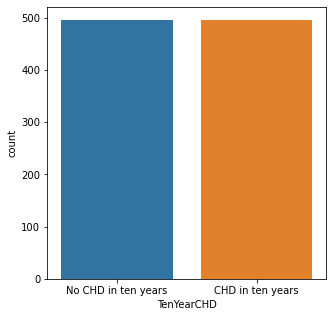

In [337]:
print(u_data.TenYearCHD.value_counts())

plt.figure(figsize=(5,5))
g = sns.countplot(u_data.TenYearCHD)
g.set_xticklabels(['No CHD in ten years', 'CHD in ten years'])

In [338]:
X_train, X_test, y_train, y_test =\
train_test_split(u_data.drop('TenYearCHD', axis=1), u_data.TenYearCHD, test_size=0.3, random_state=seed)

In [339]:
svm = SVC(kernel='rbf', gamma='auto', C=100, random_state=seed, probability=True)
svm.fit(X_train, y_train)
print("Accuracy sul training set: %0.2f"%svm.score(X_train,y_train))

Accuracy sul training set: 1.00


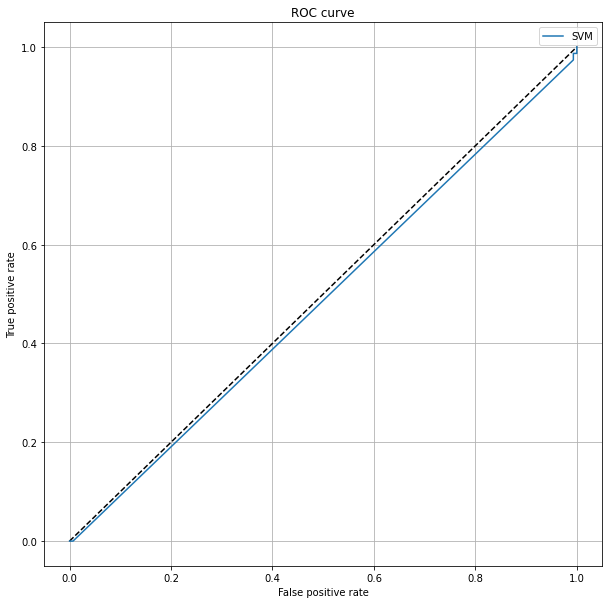

SVM

Error: 0.500363396689363
MSE: 0.25038268574209693

Confusion Matrix:
[[145   1]
 [152   0]]

Classification Report
              precision    recall  f1-score   support

           0       0.49      0.99      0.65       146
           1       0.00      0.00      0.00       152

    accuracy                           0.49       298
   macro avg       0.24      0.50      0.33       298
weighted avg       0.24      0.49      0.32       298

Accuracy
0.4865771812080537
------------------------------------------------------



In [340]:
y_pred_svm = svm.predict_proba(X_test)[:,1]

fpr_svm, tpr_svm, threshold_svm = roc_curve(y_test, y_pred_svm)

plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_svm, tpr_svm, label='SVM')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.grid()
plt.show()

print("SVM\n")
print("Error:",mean_absolute_error(y_test, y_pred_svm))
print("MSE:",mean_squared_error(y_test, y_pred_svm))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm.round()))
print("\nClassification Report")
print(classification_report(y_test, y_pred_svm.round()))
print("Accuracy")
print(accuracy_score(y_test, y_pred_svm.round(), normalize=True))
print("------------------------------------------------------\n")

<p>Undersampling is probably not the right choice in this situation: as the logs tell almost all the scores (accuracy, f1-score etc) are low. Futhermore, in this case is possible to notice that the undersampling leads to overfitting (perfect accuracy with the training set, very low accuracy with test set). So, undersampling shouldn't be used with this dataset.</p>

<h3>5.1.2 Oversampling</h3>

<p>Oversampling means to add new records (duplicating existing one) inside class with few records untill all the classes have the same number of recors.</p>

<p>In this case too, it will be shown how to perform oversampling with the Framingham dataset using a SVM classifier to understand if the results are acceptable.</p>

In [351]:
o_data = framingham[framingham.TenYearCHD==1].copy()
for i in range(5):
    o_data = o_data.append(framingham[framingham.TenYearCHD==1].copy())

o_data = o_data.append(framingham[framingham.TenYearCHD==0].sample(n=len(o_data[o_data.TenYearCHD==1]), random_state=seed).copy())

/home/mc/anaconda3/envs/fad/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'No CHD in ten years'), Text(1, 0, 'CHD in ten years')]

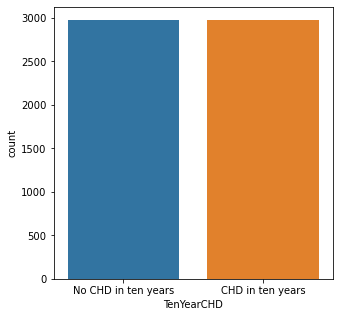

In [352]:
plt.figure(figsize=(5,5))
g = sns.countplot(o_data.TenYearCHD)
g.set_xticklabels(['No CHD in ten years', 'CHD in ten years'])

In [353]:
X_train, X_test, y_train, y_test =\
train_test_split(o_data.drop('TenYearCHD', axis=1), o_data.TenYearCHD, test_size=0.3, random_state=seed)

In [354]:
svm = SVC(kernel='rbf', gamma='auto', C=100, random_state=seed, probability=True)
svm.fit(X_train, y_train)
print("Accuracy sul training set: %0.2f"%svm.score(X_train,y_train))

Accuracy sul training set: 1.00


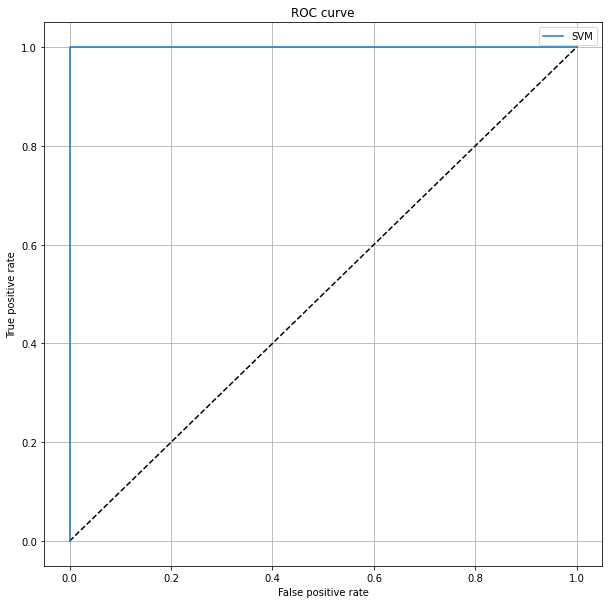

SVM

Error: 0.0039396331888220185
MSE: 3.1456087715662545e-05

Confusion Matrix:
[[883   0]
 [  0 903]]

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       883
           1       1.00      1.00      1.00       903

    accuracy                           1.00      1786
   macro avg       1.00      1.00      1.00      1786
weighted avg       1.00      1.00      1.00      1786

Accuracy
1.0
------------------------------------------------------



In [355]:
y_pred_svm = svm.predict_proba(X_test)[:,1]

fpr_svm, tpr_svm, threshold_svm = roc_curve(y_test, y_pred_svm)

plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_svm, tpr_svm, label='SVM')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.grid()
plt.show()

print("SVM\n")
print("Error:",mean_absolute_error(y_test, y_pred_svm))
print("MSE:",mean_squared_error(y_test, y_pred_svm))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm.round()))
print("\nClassification Report")
print(classification_report(y_test, y_pred_svm.round()))
print("Accuracy")
print(accuracy_score(y_test, y_pred_svm.round(), normalize=True))
print("------------------------------------------------------\n")

<p>Results are clearly better than the ones stated in section 5.1.1. The only concern could be that this strategy is probably affected by overfitting too. This is possible because the class with less records (class 0) has a fourth of the number of records of class 1. So during oversampling, the algorithm probably duplicated 5 times the same records.</p>

<h3>5.1.3 SMOTE</h3>

<p>SMOTE is an algorithm used to perform oversampling with synthetic data. The most important point is that it duplicates less data in total compared with classic oversampling techniques.</p>

<p>In this case too, it will be used an SVM classifier.</p>

In [356]:
s_fram = framingham[framingham.TenYearCHD==1].copy()
s_fram= s_fram.append(framingham[framingham.TenYearCHD==0].sample(n=3000, random_state=seed).copy())

In [357]:
X_resampled, y_resampled = SMOTE(k_neighbors=5, random_state=seed).fit_resample(s_fram.drop('TenYearCHD', axis=1), s_fram.TenYearCHD)
print(sorted(Counter(y_resampled).items()))

[(0, 3000), (1, 3000)]


In [358]:
X_train, X_test, y_train, y_test =\
train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=seed)

In [359]:
svm = SVC(kernel='rbf', gamma='auto', C=100, random_state=seed, probability=True)
svm.fit(X_train, y_train)
print("Accuracy sul training set: %0.2f"%svm.score(X_train,y_train))

Accuracy sul training set: 1.00


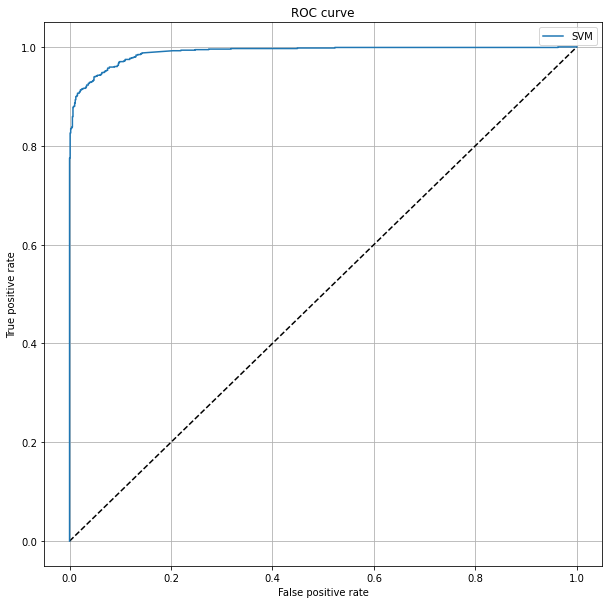

SVM

Error: 0.10738568240190971
MSE: 0.08709460053138261

Confusion Matrix:
[[892   1]
 [184 723]]

Classification Report
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       893
           1       1.00      0.80      0.89       907

    accuracy                           0.90      1800
   macro avg       0.91      0.90      0.90      1800
weighted avg       0.91      0.90      0.90      1800

Accuracy
0.8972222222222223
------------------------------------------------------



In [360]:
y_pred_svm = svm.predict_proba(X_test)[:,1]

fpr_svm, tpr_svm, threshold_svm = roc_curve(y_test, y_pred_svm)

plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_svm, tpr_svm, label='SVM')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.grid()
plt.show()

print("SVM\n")
print("Error:",mean_absolute_error(y_test, y_pred_svm))
print("MSE:",mean_squared_error(y_test, y_pred_svm))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm.round()))
print("\nClassification Report")
print(classification_report(y_test, y_pred_svm.round()))
print("Accuracy")
print(accuracy_score(y_test, y_pred_svm.round(), normalize=True))
print("------------------------------------------------------\n")

In [361]:
data_resampled = pd.DataFrame(data= X_resampled, columns=s_fram.drop('TenYearCHD', axis=1).columns)
data_resampled['TenYearCHD']=y_resampled
print('Number of duplicated samples:',\
      len(data_resampled[data_resampled.TenYearCHD==1])-len(data_resampled[data_resampled.TenYearCHD==1].drop_duplicates()))

Number of duplicated samples: 0


<p>The dataset modelled by SMOTE has very high values for accuracy and recall, which is very good in this situation.</p>

<p>Even the number of duplicated samples is 0 which is a very good new.</p>

<h2>5.3 Logistic Regression</h2>

<p>The goal is to be able to determine whether a patient will suffer a CHD in 10 years or not, based on his current vital parameters. So "TenYearCHD" will be considered as the dependent variable to be forecasted, while all the other columns will be considered the independent variables.</p>

<p>First, it is needed to check which combination of parameters will allow to classificate records. It is not needed to use all of them: a simpler model would be suggested if possible.</p>

In [362]:
def print_columns_with_exceptions(columns, exceptions):
    result = ""
    for col in set(columns)-set(exceptions):
        result = "{}+{}".format(col,result)
    return result[:len(result)-1]

In [363]:
exc =["TenYearCHD"]
model = logit('TenYearCHD ~ {}'.format(print_columns_with_exceptions(framingham.columns,exc)),framingham).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.149381
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3827
Model:                          Logit   Df Residuals:                     3811
Method:                           MLE   Df Model:                           15
Date:                Mon, 05 Jul 2021   Pseudo R-squ.:                  0.6126
Time:                        11:51:59   Log-Likelihood:                -571.68
converged:                       True   LL-Null:                       -1475.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -33.3282      1.771    -18.822      0.000     -36.799     -29.858
prevalentStroke     1.8164      0.809      2.245      0.025       0.231       3.402
diabetes           -0.5494      0.565     -0.972      0.331      -1.658       0.559
totChol             0.0375      0.002     16.160      0.000       0.033       0.042
heartRate           0.0008      0.007      0.123      0.902      -0.012       0.014
BMI                 0.0285      0.021      1.387      0.166      -0.012       0.069
age                 0.1187      0.011     10.502      0.000       0.097       0.141
glucose             0.0053      0.003      1.556      0.120      -0.001       0.012
cigsPerDay         -0.0091      0.008     -1.176      0.239      -0.024       0.006
sysBP               0.0446      0.006      6.997      0.000       0.032       0.057
diaBP               0.0103      0.010      1.008      0.313      -0.010       0.030
sex                 5.3914      0.317     16.988      0.000       4.769       6.013
currentSmoker       4.9011      0.316     15.518      0.000       4.282       5.520
prevalentHyp        0.2940      0.206      1.429      0.153      -0.109       0.697
BPMeds              1.3990      0.247      5.663      0.000       0.915       1.883
education           0.0049      0.111      0.044      0.965      -0.212       0.221
===================================================================================

Possibly complete quasi-separation: A fraction 0.24 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

<p>The Pseudo $R^2$ value is good enough. It could be interesting to see how dataset made with undersampling/oversampling/SMOTE would perform.</p>

In [364]:
model = logit('TenYearCHD ~ {}'.format(print_columns_with_exceptions(u_data.columns,exc)),u_data).fit()
print(model.prsquared)
model = logit('TenYearCHD ~ {}'.format(print_columns_with_exceptions(o_data.columns,exc)),o_data).fit()
print(model.prsquared)
model = logit('TenYearCHD ~ {}'.format(print_columns_with_exceptions(data_resampled.columns,exc)),data_resampled).fit()
print(model.prsquared)

Optimization terminated successfully.
         Current function value: 0.197044
         Iterations 9
0.7157262962615117
Optimization terminated successfully.
         Current function value: 0.214002
         Iterations 9
0.691260184920791
Optimization terminated successfully.
         Current function value: 0.277787
         Iterations 8
0.5992386486989706


In [334]:
exc =["TenYearCHD"]
results = []
for i in range(len(data_resampled.columns) - 1):
    columns = print_columns_with_exceptions(framingham.columns,exc)
    model = logit('TenYearCHD ~ {}'.format(columns),data_resampled).fit()
    results.append([columns, model.prsquared, model.llr_pvalue])
    exc.append(model.pvalues.idxmax())
    print(model.pvalues.idxmax())

         Current function value: inf
         Iterations: 35


/home/mc/anaconda3/envs/fad/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1799: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/home/mc/anaconda3/envs/fad/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1852: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


LinAlgError: Singular matrix

In [ ]:
pd.DataFrame(data=results, columns=['Col','prsquared', 'llr-pvalue'])

<h1>References</h1>

<ol>
    <li><a href="https://en.wikipedia.org/wiki/Framingham_Risk_Score">https://en.wikipedia.org/wiki/Framingham_Risk_Score</a></li>
</ol>